# Project Introduction

The main objective of this study is to predict the nutrition score of several food items by utilizing the nutrient makeup provided in the Open Food Facts dataset, followed by testing against the nutrition scores and grades already provided. Since not all food items in the dataset obtain a nutritional score, these can be used as a testing set, while the ones with scores can be used to actually train a model in predicting nutritional scores based off the nutritional makeup of different foods. These nutrition scores will also be compared to health outcomes for the different regions those foods are associated with, which will help in obtaining a better understanding for any correlation between nutrition score and health outcomes, which therefore also ties back and relates to the nutritional makeup of such foods. 

This is a supervised learning problem, so we will fit a regression model, allowing us to extract feature importance and understand how these nutritional scores change as our inputs change. Predicting the nutririon score allows for unique insights into which nutrients are more impactful for overall nutrition and allows us to predict nutrition scores for unscored data items.

Below, the steps taken will be displayed, including plenty of data preprocessing, data anlysis (which primarily dealt with handling an overabundance of null values), and finally, the development and fine tuning of a machine learning algorithm. 

## DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

**In this section, both datasets (open food facts and health and nutrition population outcomes were downloaded, cleaned, irrelevant columns were dropped, and data was explored with some figures presented below. Ultimately columns that would be relevant features for modeling were determined. There was not found to be a correlation between nutrition scores and health outcomes. ** 

# Importing Datasets

---



**The first step was to load all data and libraries to be used** 

In [ ]:
# Sklearn and Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!!kaggle datasets download -d theworldbank/health-nutrition-and-population-statistics

['Downloading health-nutrition-and-population-statistics.zip to /content',
 '',
 '  0% 0.00/14.0M [00:00<?, ?B/s]',
 ' 36% 5.00M/14.0M [00:00<00:00, 32.6MB/s]',
 '',
 '100% 14.0M/14.0M [00:00<00:00, 68.6MB/s]']

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/health-nutrition-and-population-statistics.zip



Archive:  /content/health-nutrition-and-population-statistics.zip
  inflating: data.csv                


In [ ]:
# TO-DO: Read the csv file and save it to a dataframe 
HNP_df = pd.read_csv('data.csv')

# Check out the first five rows
HNP_df.head()

In [ ]:
!!kaggle datasets download -d openfoodfacts/world-food-facts

In [ ]:
!unzip /content/world-food-facts.zip

In [ ]:
OFF_df=pd.read_csv("en.openfoodfacts.org.products.tsv",sep='\t')

OFF_df.head()

# Open Food Facts EDA


***Next, we started to clean the Open Food Facts datset in more depth. This included learning about what the columns were and whether they were relevant, and which ones to clean and drop. Exploratory figures shown too***

In [ ]:
print(OFF_df.shape)

(356027, 163)


Shape: (356027 rows, 163 columns)


**List of All Columns**- will be going through these in categories to explore and dropping irrelevant ones as we do so

In [ ]:
columns_list_OFF=OFF_df.columns.to_list()
print(columns_list_OFF)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

**Date/Time Related Columns**

In [ ]:
#all date related columns

date_related=OFF_df[["created_t","created_datetime","last_modified_t","last_modified_datetime"]]
date_related.head(5)


,created_t,created_datetime,last_modified_t,last_modified_datetime
0,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z
1,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z
2,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z
3,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z
4,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z


Based on the date related-columns: we should use "last_modified_datetime" as date. 


In [ ]:
drop_columns=["created_t","created_datetime","last_modified_t"]
OFF_df.drop(drop_columns, axis=1, inplace=True)

**Location Related Columns**

In [ ]:
#location_related_columns

location_related=OFF_df[["countries","countries_tags","countries_en","stores","purchase_places","cities_tags","cities","first_packaging_code_geo","manufacturing_places","manufacturing_places_tags","origins_tags","origins"]]

#find column values without nulls 
location_related_nonulls = pd.DataFrame()

for column in location_related.columns:
  location_related_nonulls[[column]]=location_related[[column]].dropna().reset_index(drop=True)

location_related_nonulls.head(5)

,countries,countries_tags,countries_en,stores,purchase_places,cities_tags,cities,first_packaging_code_geo,manufacturing_places,manufacturing_places_tags,origins_tags,origins
0,en:FR,en:france,France,Costco,"Roissy,France",brignemont-haute-garonne-france,b,"43.783333,0.983333",Brossard Québec,brossard-quebec,quebec,Québec
1,US,en:united-states,United States,Costco,"Roissy,France",saint-didier-au-mont-d-or-rhone-france,b,"45.8,4.8",Brossard Québec,brossard-quebec,quebec,Québec
2,US,en:united-states,United States,Waitrose,Brossard Québec,donzere-drome-france,c,"44.45,4.716667",United Kingdom,united-kingdom,france,France
3,US,en:united-states,United States,Costco,"Brent,UK",molay-littry-calvados-france,c,"49.25,-0.883333",Brossard Québec,brossard-quebec,quebec,Québec
4,US,en:united-states,United States,Costco,Brossard Québec,clecy-calvados-france,a,"48.916667,-0.483333","Brossard,Québec","brossard,quebec",quebec,Québec


After going through each of the location-related columns, the ones relevant to our analysis are the countries and origins. The other columns focus on cities, stores, and manufacturing which is irrelevant for our analysis. 

In [ ]:
drop_columns=["stores","purchase_places","cities_tags","cities","first_packaging_code_geo","manufacturing_places","manufacturing_places_tags"]
OFF_df.drop(drop_columns, axis=1,inplace=True)


In [ ]:
OFF_df["origins"].isna().sum()

330977

Origins column could relate to country, but high amount of nulls and not relevent to modeling in future-drop

In [ ]:
drop_columns=["origins","origins_tags"]
OFF_df.drop(drop_columns, axis=1,inplace=True)


Which Country Column Should be Used? Drop Other Columns

In [ ]:
#make sure the countries column in OFF and HNP match format for most part
print(OFF_df[["countries","countries_tags","countries_en"]])
HNP_countries=HNP_df[['Country Name', 'Country Code']]
print(HNP_countries[HNP_countries["Country Name"]=="United States"])

       countries    countries_tags   countries_en
0          en:FR         en:france         France
1             US  en:united-states  United States
2             US  en:united-states  United States
3             US  en:united-states  United States
4             US  en:united-states  United States
...          ...               ...            ...
356022        US  en:united-states  United States
356023     China          en:china          China
356024    France         en:france         France
356025     en:FR         en:france         France
356026        US  en:united-states  United States

[356027 rows x 3 columns]
        Country Name Country Code
85215  United States          USA
85216  United States          USA
85217  United States          USA
85218  United States          USA
85219  United States          USA
...              ...          ...
85555  United States          USA
85556  United States          USA
85557  United States          USA
85558  United States          USA

countries  and countries_tags is not the column we want- will use countries_en and drop other two since countries_en matches the syntax of country names in the health and nutrition population dataset. 


In [ ]:
drop_columns=["countries","countries_tags"]
OFF_df.drop(drop_columns, axis=1,inplace=True)

In [ ]:
OFF_df["countries_en"].unique()

Countries column appears that some instances have multiple columns listed. To clean, use explode to separate countries into multiple rows (repeat instances).

In [ ]:
#first drop any rows without countries
OFF_df.dropna(subset=["countries_en"],inplace=True)


In [ ]:
from ast import literal_eval
#use explode to separate countries into multiple rows since some instances have multiple countries
country_list=OFF_df["countries_en"].apply(lambda x:x.split(","))
OFF_df["countries_final"]=country_list
OFF_df["countries_final"]=OFF_df["countries_final"].to_list()
OFF_df["countries_final"] = OFF_df["countries_final"].apply(lambda x: literal_eval(str(x)))
exploded_df_OFF = OFF_df.explode('countries_final', ignore_index=True)

Make sure the countries match the countries in the health and nutrition population dataset.

In [ ]:
list_HNP=HNP_df["Country Name"].to_list()
matched_countries_OFF=exploded_df_OFF[exploded_df_OFF["countries_final"].isin(list_HNP)]

In [ ]:
#drop the countries_en column
OFF_df=matched_countries_OFF.drop("countries_en", axis=1)

*What are the Most Common Countries?*





Text(0.5, 1.0, 'Common Countries for Foods in Open Food Facts')

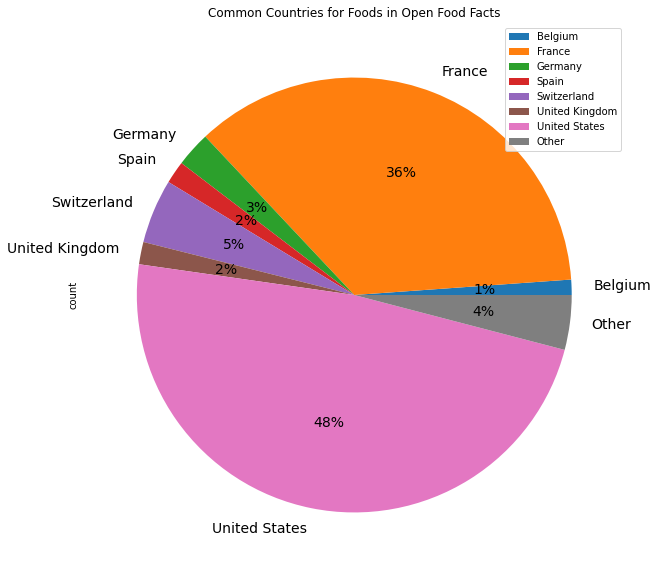

In [ ]:
country = OFF_df.groupby(['countries_final'])['countries_final'].count().reset_index(name="count") #groupby countries and count 
other_threshold=int(country["count"].sum()*0.01) #if less than than one percent, group into other category
other_countries=country[country["count"]<other_threshold]

other_val=other_countries["count"].sum() #find count of "other" category

#add "other" back to countries list
common_countries=country[country["count"]>=other_threshold]
common_countries
df2={"countries_final":"Other","count":other_val}
common_countries = common_countries.append(df2, ignore_index = True)
CC=common_countries.set_index("countries_final")

#make pie chart
CC.plot(kind="pie",y="count", autopct='%.0f%%', figsize=(10,10),textprops={'fontsize': 14})
plt.title("Common Countries for Foods in Open Food Facts")




Food products in Open Food Facts were most commonly present in the United States and France

**Status Related Columns**

In [ ]:
status_related_col=["states","states_tags","states_en"]
OFF_df[status_related_col].head(5)

States columns- have to do with whether it is completed or not- should look into how many rows are actually completed. 
1068 different tags for states- each of them talk about what is "to-be-completed" and what is completed. This shows that many items on the list are still to be completed: especially based on the number of nulls in columns as shown below. Drop these columns.


In [ ]:
drop_columns=status_related_col
OFF_df.drop(drop_columns, axis=1, inplace=True)

**What are the nutrition score related columns?**

In [ ]:
#grade/score related columns

grade_related=OFF_df[["nutrition_grade_uk","nutrition-score-uk_100g","nutrition_grade_fr","nutrition-score-fr_100g"]]

grade_related.head(5)

,nutrition_grade_uk,nutrition-score-uk_100g,nutrition_grade_fr,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN
1,NaN,14.0,d,14.0
2,NaN,0.0,b,0.0
3,NaN,12.0,d,12.0
4,NaN,NaN,NaN,NaN


*How are Nutrition Scores for France and UK Related?*



Means:
nutrition-score-uk_100g    9.010944
nutrition-score-fr_100g    9.204557
dtype: float64


Standard Deviations:
nutrition-score-uk_100g    9.170104
nutrition-score-fr_100g    9.013342
dtype: float64


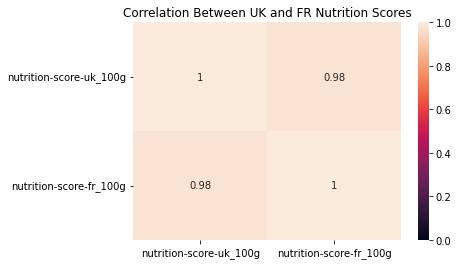

In [ ]:
import seaborn as sns
scores = OFF_df[['nutrition-score-uk_100g', 'nutrition-score-fr_100g']].dropna(how='any') #drop nulls 
correlation = scores.corr()
ax = plt.axes()
sns.heatmap(correlation, annot=True, vmin=0, vmax=1,ax=ax) #plot heatmap of correlation
ax.set_title('Correlation Between UK and FR Nutrition Scores')

means = scores.mean()
stds = scores.std()


print("\n\nMeans:")
print(means)
print("\n\nStandard Deviations:")
print(stds)

Both the UK and France scores are highly correlated and have similar means and standard deviations. Therefore, don't need to use both, can use one as a nutrition score. 

*How Does Nutrition Score Relate to Nutrition Grade?*

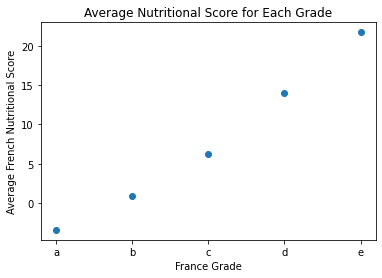

In [ ]:
france_scores = OFF_df[['nutrition_grade_fr', 'nutrition-score-fr_100g']].dropna(how='any') #drop nulls so every score has grade
means = france_scores.groupby('nutrition_grade_fr', as_index=False).mean() #group scores by grade and average
plt.scatter(means['nutrition_grade_fr'], means['nutrition-score-fr_100g']) 
plt.title('Average Nutritional Score for Each Grade')
plt.xlabel('France Grade')
plt.ylabel('Average French Nutritional Score')
plt.show()

There is a clear relationship between grade and nutrition score as seen here where a grade of a is associated with a lower score whereas a grade of e is associated with a higher score. Thus, we can replace grades with the average score for that grade to utilize scores in the modeling for regression.

A "better" grade is associated with something of higher nutrition. So lower nutrition scores are associated with healthier food. 



In [ ]:
OFF_df[["product_name",'nutrition_grade_fr', 'nutrition-score-fr_100g']].dropna(how='any')


,product_name,nutrition_grade_fr,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),d,14.0
2,Peanuts,b,0.0
3,Organic Salted Nut Mix,d,12.0
7,Organic Muesli,c,7.0
12,Zen Party Mix,d,12.0
...,...,...,...
363553,Neszt Cochon Con,d,17.0
363556,Natural Cassava,a,-1.0
363576,Tartines craquantes bio au sarrasin,a,-4.0
363580,Amandes,b,0.0


**Exploring relevance of other category-related columns:**

In [ ]:
#exploring what other columns are:
category=OFF_df[['categories', 'categories_tags', 'categories_en',"main_category","main_category_en","pnns_groups_1","pnns_groups_2"]]


In [ ]:
category[~category["main_category"].isnull()].head(5)

,categories,categories_tags,categories_en,main_category,main_category_en,pnns_groups_1,pnns_groups_2
47,Filet de bœuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,unknown,unknown
178,Légumes-feuilles,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:plant-based-foods-and-beverages,Plant-based foods and beverages,Fruits and vegetables,Vegetables
179,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","en:sugary-snacks,en:biscuits-and-cakes,en:past...","Sugary snacks,Biscuits and cakes,Pastries",en:sugary-snacks,Sugary snacks,Sugary snacks,Biscuits and cakes
181,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:plant-based-foods-and-beverages,Plant-based foods and beverages,Cereals and potatoes,Bread
184,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","en:sugary-snacks,en:biscuits-and-cakes,en:past...","Sugary snacks,Biscuits and cakes,Pastries",en:sugary-snacks,Sugary snacks,Sugary snacks,Biscuits and cakes


All of these columns are describing the category of food but pnns_groups_1 and pnns_groups_2 seem to be the easiest to clean so these will be the focus.

In [ ]:
OFF_df["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Beverages', 'Composite foods',
       'Fish Meat Eggs', 'Fat and sauces', 'Milk and dairy products',
       'fruits-and-vegetables', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [ ]:
OFF_df["pnns_groups_2"].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Sweetened beverages', 'Pizza pies and quiche', 'Meat',
       'Sweets', 'Non-sugared beverages', 'Alcoholic beverages',
       'Dressings and sauces', 'Ice cream', 'Cheese', 'One-dish meals',
       'vegetables', 'Appetizers', 'Chocolate products', 'Soups',
       'Fruits', 'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats',
       'Artificially sweetened beverages', 'Fruit juices', 'Nuts',
       'Breakfast cereals', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Processed meat', 'Potatoes', 'pastries', 'Dairy desserts',
       'Fruit nectars', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

Groups PNNS 2 has more specific categories compared to pnns_groups_1, and both are relatively easy to clean with some repeated values like "Vegetables" and "vegetables. 

In [ ]:
drop_columns=["emb_codes_tags","emb_codes",'categories', 'categories_tags', 'categories_en',"main_category","main_category_en","pnns_groups_2"]
OFF_df.drop(drop_columns, axis=1, inplace=True)

CLEANING pnns columns

In [ ]:
OFF_df["pnns_groups_1"]=OFF_df["pnns_groups_1"].apply(lambda x:"Vegetables" if x=="vegetables" or x=="Vegetables" else x)
OFF_df["pnns_groups_1"]=OFF_df["pnns_groups_1"].apply(lambda x:"Cereals" if x=="Cereals" or x=="Breakfast cereals" or x=="cereals" else x)
OFF_df["pnns_groups_1"]=OFF_df["pnns_groups_1"].apply(lambda x:"Nuts" if x=="nuts" or x=="Nuts" else x)
OFF_df["pnns_groups_1"]=OFF_df["pnns_groups_1"].apply(lambda x:"Legumes" if x=="Legumes" or x=="legumes" else x)
OFF_df["pnns_groups_1"]=OFF_df["pnns_groups_1"].apply(lambda x:"Fruits" if x=="Fruits" or x=="fruits" else x)
print(OFF_df["pnns_groups_1"].unique())

[nan 'unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Beverages' 'Composite foods' 'Fish Meat Eggs'
 'Fat and sauces' 'Milk and dairy products' 'fruits-and-vegetables'
 'Salty snacks' 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']


*How Does Nutrition Score Differ By Category*

Text(0.5, 1.0, 'Categories of Food and Nutrition Scores')

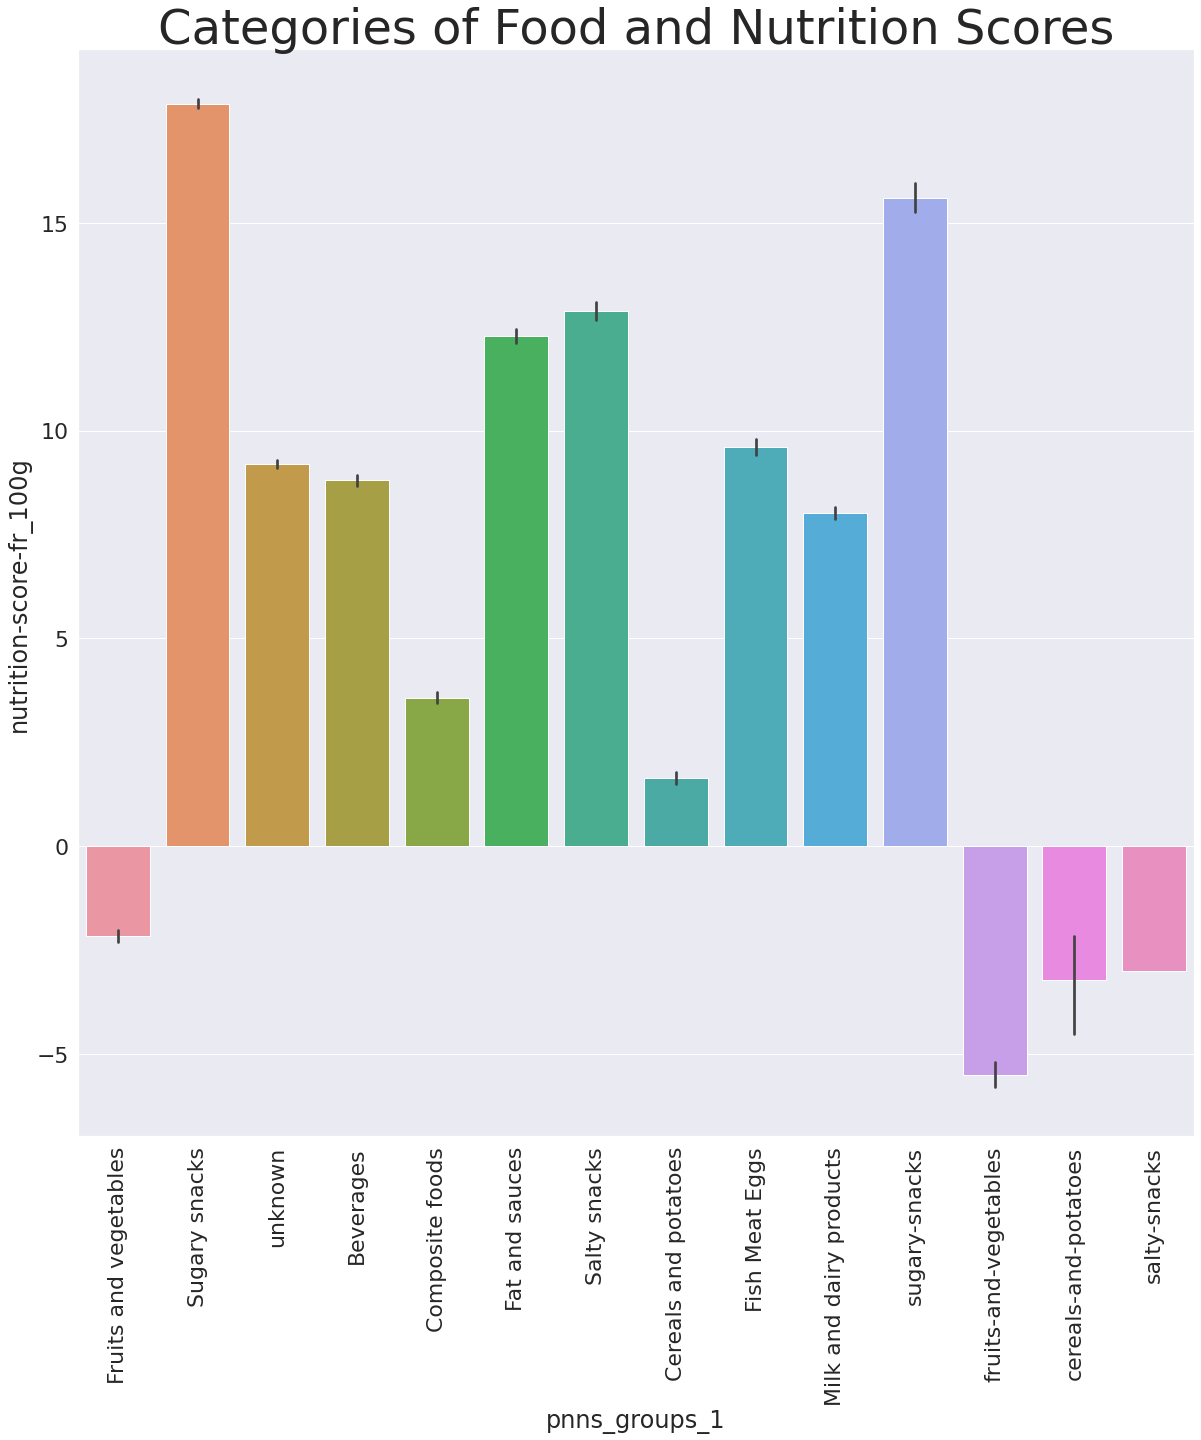

In [ ]:
#drop rows with NaN in nutrition score and pnns_groups_1 and make bar plot
categories_food = OFF_df[["pnns_groups_1", 'nutrition-score-fr_100g']].dropna(axis=0,how="any")
fig, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale = 4)
chart=sns.barplot(x="pnns_groups_1",y="nutrition-score-fr_100g",data=categories_food,ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Categories of Food and Nutrition Scores")


From this barplot, it can be seen that potatoes, eggs, vegetables, fruits, and legumes are the healthiest. 

The highest nutrition scores (unhealhiest)= chocolate product, biscuits and cake. 

**Exploring Columns Related to Additives and Traces and Palm Oil**

Additives

In [ ]:
OFF_df[["additives_n", "additives_tags", "additives_en"]].dtypes

additives_n       float64
additives_tags     object
additives_en       object
dtype: object

N means number of additives, tags are abbreviations here, additives listed. The number of additives seems the most relevant here, although conducting one-hot encoding on the additives themselves could be useful. 


(array([-20.,   0.,  20.,  40.]), <a list of 4 Text major ticklabel objects>)

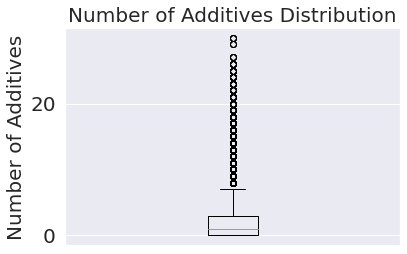

In [ ]:
plt.boxplot(OFF_df["additives_n"].dropna())
plt.ylabel("Number of Additives",fontsize=20)
plt.title("Number of Additives Distribution",fontsize=20)
plt.xticks([])
plt.yticks(fontsize=20)


It appears that most products have 0-few additives added with a handful of outliers. May not be a useful feature

Traces

In [ ]:
traces=OFF_df[["traces","traces_tags","traces_en"]]


In [ ]:
frac_nan_perCol_OFF = []

for i in range(traces.shape[1]):
  # calculate fraction of NaN values in the column
  frac_nan = len(traces[traces[[traces.columns[i]]].isna()[traces.columns[i]] == True]) / len(traces[[traces.columns[i]]].isna()[traces.columns[i]])


  # append the fraction of NaN values for the column to the list
  frac_nan_perCol_OFF.append(frac_nan)

columns_OFF = traces.columns.tolist()

dictionary_fracNulls_OFF = dict(zip(columns_OFF, frac_nan_perCol_OFF))
print(dictionary_fracNulls_OFF)

{'traces': 0.9158322026797184, 'traces_tags': 0.9158349772898163, 'traces_en': 0.9158349772898163}


traces have high number of nulls and not much relevance to nutrition score, will drop

In [ ]:
OFF_df.drop(traces, axis=1, inplace=True)

Palm Oil

[]

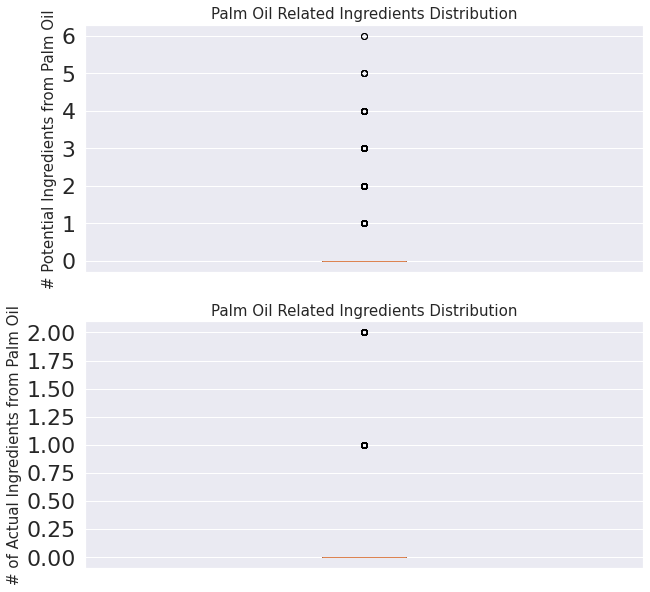

In [ ]:
fig,ax=plt.subplots(2,figsize=(10,10))
sns.set(font_scale = 1)
ax[0].boxplot(OFF_df["ingredients_that_may_be_from_palm_oil_n"].dropna())
ax[0].set_ylabel("# Potential Ingredients from Palm Oil",fontsize=15)
ax[0].set_title("Palm Oil Related Ingredients Distribution",fontsize=15)
ax[0].set_xticks([])
ax[1].boxplot(OFF_df["ingredients_from_palm_oil_n"].dropna())
ax[1].set_ylabel("# of Actual Ingredients from Palm Oil",fontsize=15)
ax[1].set_title("Palm Oil Related Ingredients Distribution",fontsize=15)
ax[1].set_xticks([])


It appears that Ingredients related to Palm Oil might not be very relevant as most of the products have zero ingredients with a few outliers.

**Brands**

What Brands Were The Foods From?

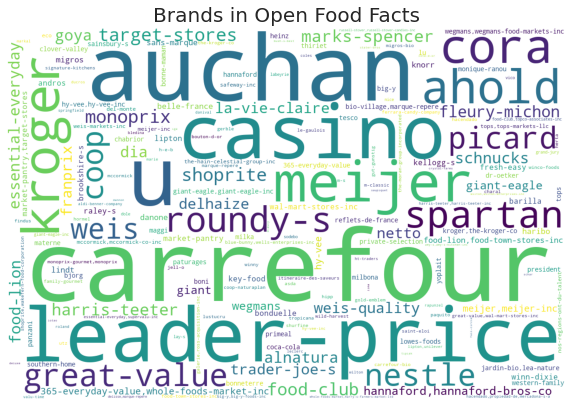

In [ ]:
#Most Common Brands
brand_frequencies = OFF_df['brands_tags'].dropna().value_counts()
brand_frequencies.head(10)

# Word Cloud of Brands (OFF)
import wordcloud

plt.figure(figsize=(10,10))
wc = wordcloud.WordCloud(background_color ='white', width = 1200, height = 800).generate_from_frequencies(frequencies=brand_frequencies)
plt.imshow(wc)
plt.axis("off")
plt.title("Brands in Open Food Facts",fontsize=20)
plt.show()

***Dropping More Irrelevent Columns***

Next, we started deciding which feature colunms for the Open Food Facts dataset we wanted to drop. This involved deciding on which feature columns seemed irrelevant, which also included eliminating some columns that had too many null values (a high percentage of nulls in the column).

In [ ]:
#creating list of columns to drop based on above and also dropping columns that are not in English- choosing en columns!
drop_columns=["code","url","creator","packaging","packaging_tags","additives","allergens","image_url", "image_small_url","ingredients_that_may_be_from_palm_oil_tags","ingredients_from_palm_oil_tags"]
OFF_df_rel=OFF_df.drop(drop_columns, axis=1,inplace=True)


In [ ]:
OFF_df_rel=OFF_df.drop(["generic_name"], axis=1,inplace=True)

In [ ]:
#deciding between tags and no tags since they are same! This will result in more columns dropped.

print(OFF_df["labels_tags"].unique()[12])
print(OFF_df["labels_tags"].nunique())
print(OFF_df["labels_tags"].isna().sum())

print(OFF_df["additives_en"].unique()[12])
print(OFF_df["additives_en"].nunique())
print(OFF_df["additives_en"].isna().sum())



en:vegetarian,en:green-dot,en:pure-butter
15457
298521
E415 - Xanthan gum
39851
187244


Should pick the columns with tags for analysis if we want to use these columns:standardized.





#Standardizing Columns Across HNP and OFF Through Cleaning 



***In order to compare how nutrition scores relate to outcomes, it is important to make sure that columns in common for both datasets are formatted the same way/have the same values for a future join. This includes columns related to the year, country, and indication.***



**Year**

*Make sure same years present in HNP and OFF. First extracted years from date modified column*

In [ ]:
#extract all the years from date modified and make it a new column and drop the date modified column
def year(x):
  yr=x[0:4]
  return str(yr)
OFF_df["year"]=OFF_df["last_modified_datetime"].apply(lambda x: year(x))
OFF_df=OFF_df.drop("last_modified_datetime", axis=1)

In [ ]:
OFF_df["year"].unique() 

array(['2016', '2017', '2015', '2014', '2013', '2012'], dtype=object)

In [ ]:
HNP_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [ ]:
#filter columns of HNP to include only the years in OFF
HNP_rel=HNP_df[["Country Name","Indicator Name","2012","2013","2014","2015"]]
HNP_rel.head(5)

,Country Name,Indicator Name,2012,2013,2014,2015
0,Arab World,% of females ages 15-49 having comprehensive c...,NaN,NaN,NaN,NaN
1,Arab World,% of males ages 15-49 having comprehensive cor...,NaN,NaN,NaN,NaN
2,Arab World,"Adolescent fertility rate (births per 1,000 wo...",49.383745,48.796558,48.196418,NaN
3,Arab World,Adults (ages 15+) and children (0-14 years) li...,NaN,NaN,NaN,NaN
4,Arab World,Adults (ages 15+) and children (ages 0-14) new...,NaN,NaN,NaN,NaN


no data for 2016 and 2017 in HNP, so use 2015 data for that. will change year in OFF to reflect this

In [ ]:
def change_year(x):
  if x=="2017":
    y="2015"
  elif x=="2016":
    y="2015"
  else:
    y=x
  return y
OFF_df["year_changed"]=OFF_df["year"].apply(lambda x:change_year(x))

In [ ]:
OFF_df["year_changed"].unique()

array(['2015', '2014', '2013', '2012'], dtype=object)

In [ ]:
OFF_df["year_changed"].value_counts()

2015    353635
2014      5014
2013      1460
2012       302
Name: year_changed, dtype: int64

**Make Sure No Countries in HNP not in OFF**

In [ ]:
#filter all rows in HNP for the countries in OFF
list_OFF_countries=OFF_df["countries_final"].to_list()
HNP_df=HNP_df[HNP_df["Country Name"].isin(list_OFF_countries)]


**Removing Irrelevant Indications in HNP**

In [ ]:
#go through HNP and determine relevant rows of indications (use unique)
HNP_d=HNP_rel.dropna(axis=0,how='all',subset=("2012","2013","2014","2015")) #first drop rows without year
print(HNP_d.shape)

HNP_d["Indicator Name"].unique()

keep indications associated with nutrition/relevant to nutrition:


In [ ]:
#keep indications associated with nutrition/relevant to nutrition:
row_list_keep=['Consumption of iodized salt (% of households)','Low-birthweight babies (% of births)',
               'Infant and young child feeding practices, all 3 IYCF (% children ages 6-23 months)',
               'Malnutrition prevalence, height for age, female (% of children under 5)',
               'Malnutrition prevalence, height for age, male (% of children under 5)',
               'Malnutrition prevalence, weight for age, female (% of children under 5)',
               'Malnutrition prevalence, weight for age, male (% of children under 5)',
               'Prevalence of overweight, female (% of children under 5)',
               'Prevalence of overweight, male (% of children under 5)',
               'Prevalence of severe wasting, weight for height, female (% of children under 5)',
               'Prevalence of severe wasting, weight for height, male (% of children under 5)',
               'Prevalence of wasting, female (% of children under 5)',
               'Prevalence of wasting, male (% of children under 5)',
               'Prevalence of overweight (% of adults)',
               'Prevalence of overweight, female (% of female adults)',
               'Prevalence of overweight, male (% of male adults)',
               'Vitamin A supplementation coverage rate (% of children ages 6-59 months)',
               'Prevalence of overweight (% of children under 5)',
               'Prevalence of severe wasting, weight for height (% of children under 5)',
               'Prevalence of undernourishment (% of population)',
               'Prevalence of wasting (% of children under 5)',
               'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
               'Diabetes prevalence (% of population ages 20 to 79)',
               'Malnutrition prevalence, height for age (% of children under 5)'
               'Malnutrition prevalence, weight for age (% of children under 5)']

#less repetitive (ie. don't care about male vs female)
row_list_keep=['Consumption of iodized salt (% of households)','Low-birthweight babies (% of births)',
               'Prevalence of overweight (% of adults)',
               'Vitamin A supplementation coverage rate (% of children ages 6-59 months)',
               'Prevalence of overweight (% of children under 5)',
               'Prevalence of severe wasting, weight for height (% of children under 5)',
               'Prevalence of undernourishment (% of population)',
               'Prevalence of wasting (% of children under 5)',
               'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
               'Diabetes prevalence (% of population ages 20 to 79)',
               'Malnutrition prevalence, height for age (% of children under 5)'
               'Malnutrition prevalence, weight for age (% of children under 5)']

HNP_rel_nutrition=HNP_d[HNP_d["Indicator Name"].isin(row_list_keep)]


# EDA for Health and Nutrition Popuation Outcomes



***This section explores the health outcomes in the HNP dataset and includes various exploratory figures comparing health outcomes and nutrition scores***




*How Have Health Outcomes Changed From 2012-2015 Across the World*

In [ ]:
#line plot with a different color line for each health outcome where x axis is year and y axis is prevalence
outcomes_2012=HNP_rel_nutrition[["Indicator Name","2012"]].dropna(axis=0,how="any")
outcomes_2013=HNP_rel_nutrition[["Indicator Name","2013"]].dropna(axis=0,how="any")
outcomes_2014=HNP_rel_nutrition[["Indicator Name","2014"]].dropna(axis=0,how="any")
outcomes_2015=HNP_rel_nutrition[["Indicator Name","2015"]].dropna(axis=0,how="any")

outcomes_2012=outcomes_2012.groupby(by="Indicator Name").mean()
outcomes_2013=outcomes_2013.groupby(by="Indicator Name").mean()
outcomes_2014=outcomes_2014.groupby(by="Indicator Name").mean()
outcomes_2015=outcomes_2015.groupby(by="Indicator Name").mean()

In [ ]:
m1=outcomes_2012.merge(outcomes_2013,how="left", left_on='Indicator Name',right_on="Indicator Name")
m2=m1.merge(outcomes_2014,how="left", left_on='Indicator Name',right_on="Indicator Name")
yearly_outcomes=m2.merge(outcomes_2015, how="left",left_on='Indicator Name',right_on="Indicator Name")
yearly_outcomes

Text(0.5, 1.0, 'How Nutrition Outcomes Change from 2012-2015')

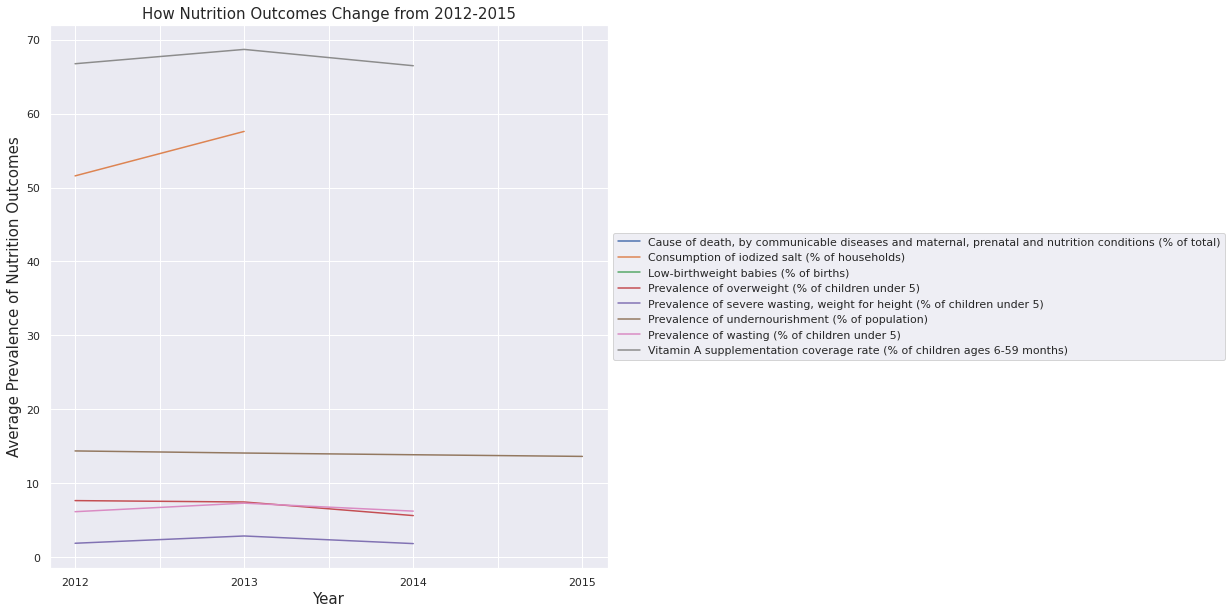

In [ ]:
yearly_outcomes.T.plot(figsize=(10,10))
plt.xlabel("Year",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Average Prevalence of Nutrition Outcomes",fontsize=15)
plt.title("How Nutrition Outcomes Change from 2012-2015",fontsize=15)


Nutrition Outcomes remain relatively the same across year, so can just keep whichever column has the numbers. 

*How Have Nutrition Scores Changed Across the Years- OFF*

(0.0, 10.0)

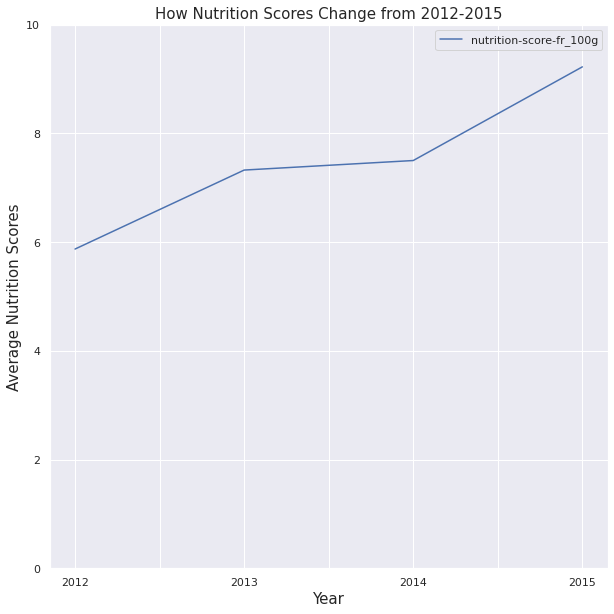

In [ ]:
scores_years=OFF_df[["year_changed","nutrition-score-fr_100g"]].groupby(by="year_changed").mean()
scores_years.plot(figsize=(10,10))
plt.xlabel("Year",fontsize=15)
plt.ylabel("Average Nutrition Scores",fontsize=15)
plt.title("How Nutrition Scores Change from 2012-2015",fontsize=15)
plt.ylim([0,10])


While health outcomes did not change much over 2012-2015, nutrition scores of food did, increasing in score, becoming unhealthier. 

*What are Nutrition Related Health Outcomes in France and USA- most common countries in Open Food Facts?*

In [ ]:
HNP_fr=HNP_rel_nutrition[(HNP_rel_nutrition["Country Name"]=="France")] 
HNP_us=HNP_rel_nutrition[(HNP_rel_nutrition["Country Name"]=="United States")] 
HNP_fr.merge(HNP_us,left_on="Indicator Name",right_on="Indicator Name")

In [ ]:
HNP_fr_us=pd.DataFrame(data=[["Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (%)",6.1,5.7],["Diabetes Prevalence (%)",5.3,10.8], ["Prevalence of OverWeight Adults (%)",60.7,67.3]],columns=["Indicator Name","France","United States"])

In [ ]:
HNP_fr_us=pd.DataFrame(data=[["Cause of death, by nutrition conditions,etc.",6.1,"France"],
                             ["Cause of death, by nutrition conditions,etc.",5.7,"United States"]
                             ,["Diabetes",5.3,"France"],["Diabetes",10.8,"United States"],
                             ["OverWeight Adults",60.7,"France"],["OverWeight Adults",67.3,"United States"]],columns=["Indicator Name","Prevalence (%)","Country"])

Text(0.5, 1.0, 'Prevalence of Nutrition Related Health Outcomes in France vs USA')

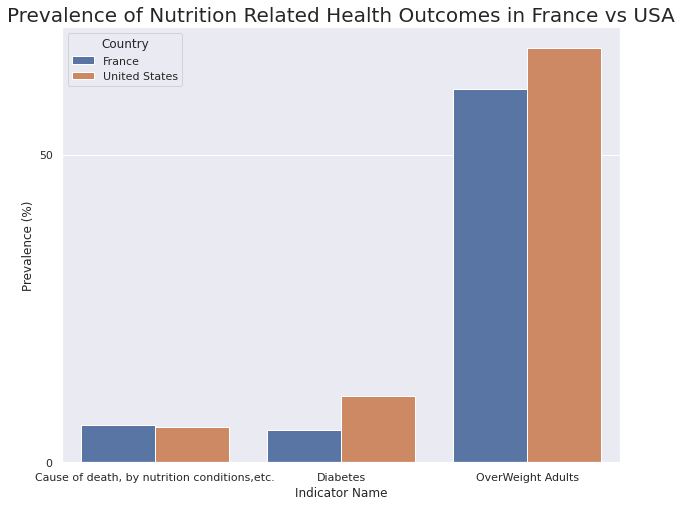

In [ ]:
plt.figure()
sns.set(rc={'figure.figsize':(10,8)})
chart=sns.barplot(x="Indicator Name",y="Prevalence (%)",hue="Country",data=HNP_fr_us)
sns.set(font_scale=8)
plt.title("Prevalence of Nutrition Related Health Outcomes in France vs USA",fontsize=20)


In [ ]:
countries_scores = OFF_df[["countries_final", 'nutrition-score-fr_100g']].dropna(axis=0,how="any")
countries_scores = countries_scores.groupby(by="countries_final",as_index=False).mean()
fr_us_scores=countries_scores[(countries_scores['countries_final']=="France") | (countries_scores['countries_final']=="United States")]
fr_us_scores

,countries_final,nutrition-score-fr_100g
31,France,8.861481
90,United States,9.450814


Based on the above plot, for the two main countries that Open Food Facts has products from, France has slightly better healthcare outcomes related to nutrition than the United States with lower prevalence of diabetes and overweight adults. This makes sense with France having a lower ("healthier") average nutrition score for the products consumed in that country. 

# Compare Health Outcomes with Nutrition Scores


***Ultimately, in this section, the OFF and HNP datasets were joined and relationships between scores, countries, and outcomes were explored. No relationship between outcomes and average scores for countries was found***

In [ ]:
#use OFF, just groupby country and average nutrition score. Then do bar chart!
OFF_df['avg_nutrition_score'] = (OFF_df['nutrition-score-fr_100g'] + OFF_df['nutrition-score-uk_100g']) / 2
OFF_df[['product_name', 'countries_final', 'avg_nutrition_score']]

# before grouping by country and averaging nutrition score per country, deal with null nutrition scores:
countries_nutritionScores = OFF_df[OFF_df['avg_nutrition_score'].notna()]

countries_nutritionScores = countries_nutritionScores.groupby('countries_final').mean()
countries_nutritionScores.head(5)

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,avg_nutrition_score
countries_final,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,0.500000,0.000000,NaN,0.000000,NaN,NaN,1289.428571,NaN,8.171429,...,NaN,NaN,NaN,NaN,NaN,6.285714,6.285714,NaN,NaN,6.285714
Algeria,NaN,1.692308,0.230769,NaN,0.153846,NaN,NaN,1566.666667,NaN,18.583889,...,13.0,NaN,12.0,NaN,NaN,15.055556,13.777778,NaN,NaN,14.416667
Andorra,NaN,0.428571,0.000000,NaN,0.142857,NaN,NaN,1081.537500,NaN,12.495000,...,NaN,NaN,NaN,NaN,NaN,8.125000,8.125000,NaN,NaN,8.125000
Argentina,NaN,2.666667,0.000000,NaN,0.166667,NaN,NaN,1171.250000,NaN,14.866667,...,NaN,NaN,NaN,NaN,NaN,13.666667,12.666667,NaN,NaN,13.166667
Armenia,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,2497.000000,NaN,49.000000,...,NaN,NaN,73.0,NaN,NaN,22.000000,22.000000,NaN,NaN,22.000000


In [ ]:
ordered_country_nutritionScores = countries_nutritionScores.sort_values('avg_nutrition_score', ascending=False)
print("Country with highest average nutrition score:")
display(ordered_country_nutritionScores[0:1])
print("Country with lowest average nutrition score:")
display(ordered_country_nutritionScores[-1:])

Country with highest average nutrition score:


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,avg_nutrition_score
countries_final,,,,,,,,,,,,,,,,,,,,,
Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,33.0,28.0,NaN,NaN,30.5


Country with lowest average nutrition score:


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,avg_nutrition_score
countries_final,,,,,,,,,,,,,,,,,,,,,
Vanuatu,NaN,1.0,0.0,NaN,0.0,NaN,NaN,887.5,NaN,4.65,...,NaN,NaN,NaN,NaN,NaN,-0.5,-0.5,NaN,NaN,-0.5


In [ ]:
# simplify this dataframe to contain only the country name and nutrition score:

countries_nutritionScores = countries_nutritionScores[['avg_nutrition_score']]
countries_nutritionScores.reset_index(inplace=True)
countries_nutritionScores


,countries_final,avg_nutrition_score
0,Albania,6.285714
1,Algeria,14.416667
2,Andorra,8.125000
3,Argentina,13.166667
4,Armenia,22.000000
...,...,...
88,United Arab Emirates,11.388889
89,United Kingdom,8.208855
90,United States,9.443950
91,Vanuatu,-0.500000


Now, the health outcomes dataframe will be merged with the dataframe containing nutritional scores and countries.

In [ ]:
#less repetitive (ie. don't care about male vs female)
row_list_keep=['Consumption of iodized salt (% of households)','Low-birthweight babies (% of births)',
               'Prevalence of overweight (% of adults)',
               'Vitamin A supplementation coverage rate (% of children ages 6-59 months)',
               'Prevalence of overweight (% of children under 5)',
               'Prevalence of severe wasting, weight for height (% of children under 5)',
               'Prevalence of undernourishment (% of population)',
               'Prevalence of wasting (% of children under 5)',
               'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
               'Diabetes prevalence (% of population ages 20 to 79)',
               'Malnutrition prevalence, height for age (% of children under 5)'
               'Malnutrition prevalence, weight for age (% of children under 5)']

HNP_rel_nutrition=HNP_d[HNP_d["Indicator Name"].isin(row_list_keep)]
len(np.unique(HNP_rel_nutrition['Indicator Name']))

10

In [ ]:
join_df = countries_nutritionScores.merge(HNP_rel_nutrition, left_on='countries_final', right_on='Country Name')
join_df

,countries_final,avg_nutrition_score,Country Name,Indicator Name,2012,2013,2014,2015
0,Albania,6.285714,Albania,"Cause of death, by communicable diseases and m...",5.1,NaN,NaN,NaN
1,Albania,6.285714,Albania,Diabetes prevalence (% of population ages 20 t...,NaN,NaN,NaN,10.300000
2,Albania,6.285714,Albania,Prevalence of overweight (% of adults),NaN,NaN,52.700000,NaN
3,Algeria,14.416667,Algeria,"Cause of death, by communicable diseases and m...",14.5,NaN,NaN,NaN
4,Algeria,14.416667,Algeria,Diabetes prevalence (% of population ages 20 t...,NaN,NaN,NaN,7.500000
...,...,...,...,...,...,...,...,...
425,World,1.700000,World,Diabetes prevalence (% of population ages 20 t...,NaN,NaN,NaN,8.525941
426,World,1.700000,World,Prevalence of overweight (% of children under 5),NaN,NaN,6.107095,NaN
427,World,1.700000,World,"Prevalence of severe wasting, weight for heigh...",NaN,NaN,2.449456,NaN
428,World,1.700000,World,Prevalence of undernourishment (% of population),11.4,11.2,11.000000,10.800000


In [ ]:
# average the prevalence of different indicators:
join_df = join_df.fillna(0)
join_df['avg_prevalence'] = join_df[['2012', '2013', '2014', '2015']].mean(axis=1)
join_df.drop(columns=['2012', '2013', '2014', '2015'], inplace = True)
join_df

,countries_final,avg_nutrition_score,Country Name,Indicator Name,avg_prevalence
0,Albania,6.285714,Albania,"Cause of death, by communicable diseases and m...",1.275000
1,Albania,6.285714,Albania,Diabetes prevalence (% of population ages 20 t...,2.575000
2,Albania,6.285714,Albania,Prevalence of overweight (% of adults),13.175000
3,Algeria,14.416667,Algeria,"Cause of death, by communicable diseases and m...",3.625000
4,Algeria,14.416667,Algeria,Diabetes prevalence (% of population ages 20 t...,1.875000
...,...,...,...,...,...
425,World,1.700000,World,Diabetes prevalence (% of population ages 20 t...,2.131485
426,World,1.700000,World,Prevalence of overweight (% of children under 5),1.526774
427,World,1.700000,World,"Prevalence of severe wasting, weight for heigh...",0.612364
428,World,1.700000,World,Prevalence of undernourishment (% of population),11.100000


With the dataframe above, one can see how the average nutrition scores for certain countries correlate to the amount and types of health outcomes present in that country over the span of 4 years.

Below, plots will be generated to display how the prevalence of certain health outcomes relates to nutrition scores.



In [ ]:
join_df.groupby(['Indicator Name', 'avg_nutrition_score']).mean()

2012  \
Indicator Name                                     avg_nutrition_score              
Cause of death, by communicable diseases and ma... 1.000000             17.600000   
                                                   1.583333             10.600000   
                                                   1.700000             23.010006   
                                                   2.818182              4.900000   
                                                   3.000000             16.300000   
...                                                                           ...   
Vitamin A supplementation coverage rate (% of c... 16.000000            90.000000   
                                                   17.000000            88.000000   
                                                   20.000000            73.000000   
                                                   20.666667            88.000000   
                                                   30.500000            99.000000   

                                                                        2013  \
Indicator Name                                     avg_nutrition_score         
Cause of death, by communicable diseases and ma... 1.000000              NaN   
                                                   1.583333              NaN   
                                                   1.700000              NaN   
                                                   2.818182              NaN   
                                                   3.000000              NaN   
...                                                                      ...   
Vitamin A supplementation coverage rate (% of c... 16.000000            89.0   
                                                   17.000000            99.0   
                                                   20.000000            82.0   
                                                   20.666667            94.0   
                                                   30.500000             0.0   

                                                                        2014  \
Indicator Name                                     avg_nutrition_score         
Cause of death, by communicable diseases and ma... 1.000000              NaN   
                                                   1.583333              NaN   
                                                   1.700000              NaN   
                                                   2.818182              NaN   
                                                   3.000000              NaN   
...                                                                      ...   
Vitamin A supplementation coverage rate (% of c... 16.000000            83.0   
                                                   17.000000            96.0   
                                                   20.000000            84.0   
                                                   20.666667            99.0   
                                                   30.500000            96.0   

                                                                        2015  
Indicator Name                                     avg_nutrition_score        
Cause of death, by communicable diseases and ma... 1.000000              NaN  
                                                   1.583333              NaN  
                                                   1.700000              NaN  
                                                   2.818182              NaN  
                                                   3.000000              NaN  
...                                                                      ...  
Vitamin A supplementation coverage rate (% of c... 16.000000             NaN  
                                                   17.000000             NaN  
                                                   20.000000             NaN  
                    

In [ ]:
len(np.unique(join_df['Indicator Name']))

10

In [ ]:
join_df['Indicator Name'][0]

'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'

In [ ]:
join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[0]]

,countries_final,avg_nutrition_score,Country Name,Indicator Name,2012,2013,2014,2015
0,Albania,6.285714,Albania,"Cause of death, by communicable diseases and m...",5.100000,NaN,NaN,NaN
3,Algeria,14.416667,Algeria,"Cause of death, by communicable diseases and m...",14.500000,NaN,NaN,NaN
12,Argentina,13.166667,Argentina,"Cause of death, by communicable diseases and m...",11.300000,NaN,NaN,NaN
16,Armenia,22.000000,Armenia,"Cause of death, by communicable diseases and m...",3.800000,NaN,NaN,NaN
21,Australia,8.268206,Australia,"Cause of death, by communicable diseases and m...",3.600000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
401,Ukraine,17.500000,Ukraine,"Cause of death, by communicable diseases and m...",5.100000,NaN,NaN,NaN
405,United Arab Emirates,11.388889,United Arab Emirates,"Cause of death, by communicable diseases and m...",11.500000,NaN,NaN,NaN
409,United Kingdom,8.208855,United Kingdom,"Cause of death, by communicable diseases and m...",7.200000,NaN,NaN,NaN
412,United States,9.443950,United States,"Cause of death, by communicable diseases and m...",5.700000,NaN,NaN,NaN


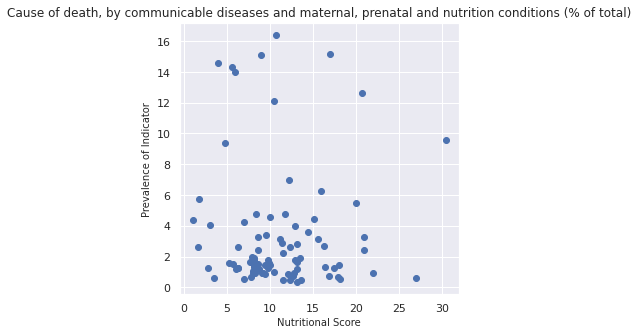

In [ ]:
nut_scores_0 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[0]]['avg_nutrition_score']
prevalence_0 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[0]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_0, prevalence_0)
plt.xlabel('Nutritional Score',fontsize=10)
plt.ylabel('Prevalence of Indicator',fontsize=10)
plt.title(np.unique(join_df['Indicator Name'])[0])
plt.show()


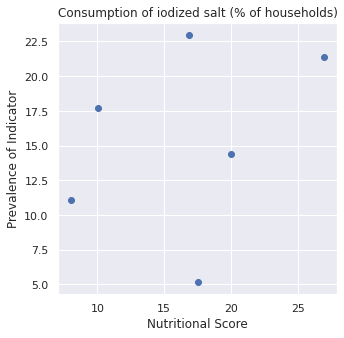

In [ ]:
nut_scores_1 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[1]]['avg_nutrition_score']
prevalence_1 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[1]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_1, prevalence_1)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[1])
plt.show()


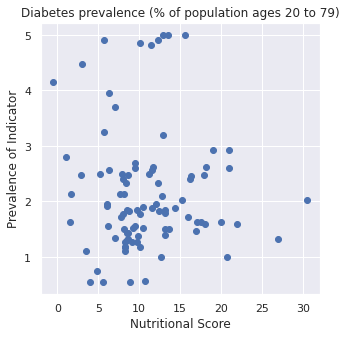

In [ ]:
nut_scores_2 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[2]]['avg_nutrition_score']
prevalence_2 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[2]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_2, prevalence_2)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[2])
plt.show()


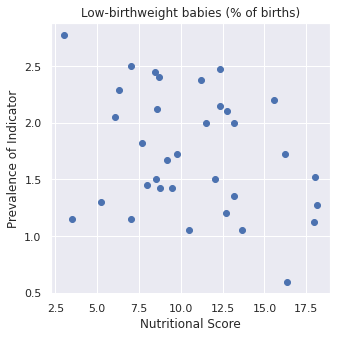

In [ ]:
nut_scores_3 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[3]]['avg_nutrition_score']
prevalence_3 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[3]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_3, prevalence_3)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[3])
plt.show()


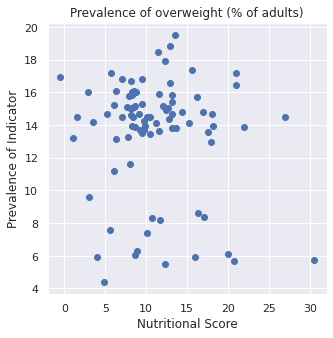

In [ ]:
nut_scores_4 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[4]]['avg_nutrition_score']
prevalence_4 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[4]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_4, prevalence_4)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[4])
plt.show()


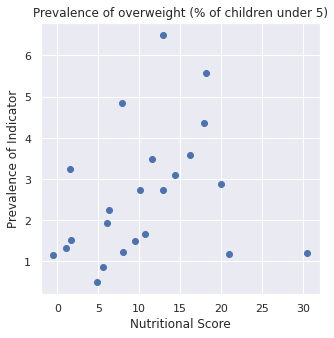

In [ ]:
nut_scores_5 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[5]]['avg_nutrition_score']
prevalence_5 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[5]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_5, prevalence_5)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[5])
plt.show()


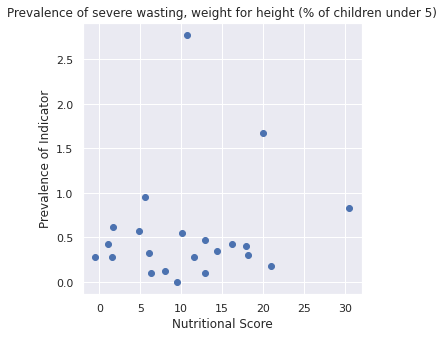

In [ ]:
nut_scores_6 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[6]]['avg_nutrition_score']
prevalence_6 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[6]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_6, prevalence_6)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[6])
plt.show()


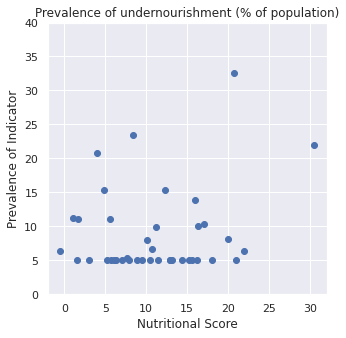

In [ ]:
nut_scores_7 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[7]]['avg_nutrition_score']
prevalence_7 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[7]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_7, prevalence_7)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[7])
plt.ylim([0,40])
plt.show()


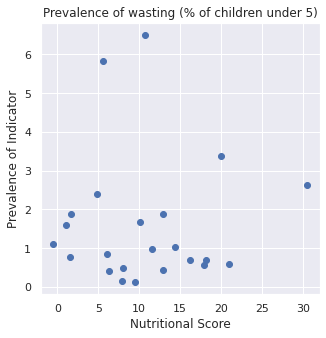

In [ ]:
nut_scores_8 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[8]]['avg_nutrition_score']
prevalence_8 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[8]]['avg_prevalence']
sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_8, prevalence_8)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[8])
plt.show()


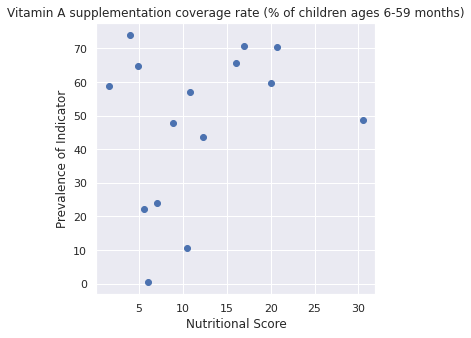

In [ ]:
nut_scores_9 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[9]]['avg_nutrition_score']
prevalence_9 = join_df[join_df['Indicator Name'] == np.unique(join_df['Indicator Name'])[9]]['avg_prevalence']

sns.set(font_scale=1)
plt.figure(figsize=(5,5))
plt.scatter(nut_scores_9, prevalence_9)
plt.xlabel('Nutritional Score')
plt.ylabel('Prevalence of Indicator')
plt.title(np.unique(join_df['Indicator Name'])[9])
plt.show()


There were no clear trends spotted between outcomes and nutrition score.

***What Countries Have the Best and Worst Nutrition Scores?***

In [ ]:
countries_scores = OFF_df[["countries_final", 'nutrition-score-fr_100g']].dropna(axis=0,how="any")
countries_scores = countries_scores.groupby(by="countries_final",as_index=False).mean()
best_scores=countries_scores.sort_values(by="nutrition-score-fr_100g",ascending=True).head(10)
worst_scores=countries_scores.sort_values(by="nutrition-score-fr_100g",ascending=False).head(10)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

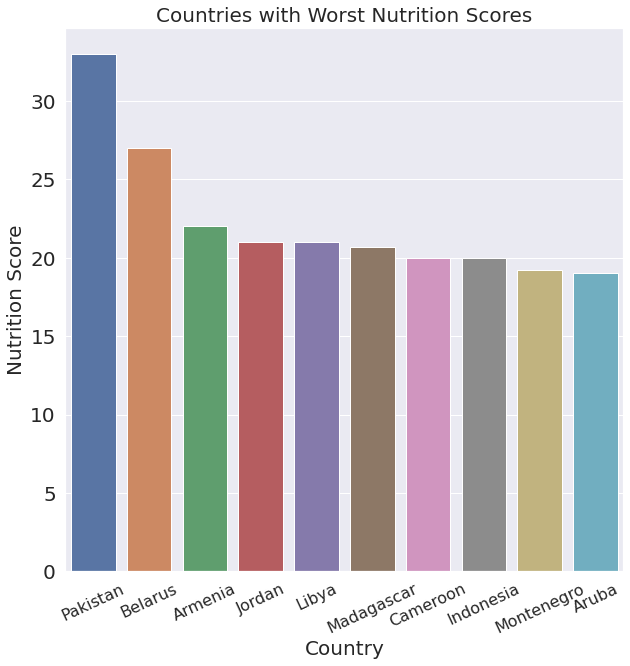

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale = 1)
chart=sns.barplot(x="countries_final",y="nutrition-score-fr_100g",data=worst_scores,ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=25)
plt.title("Countries with Worst Nutrition Scores",fontsize=20)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Nutrition Score",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=16)






(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

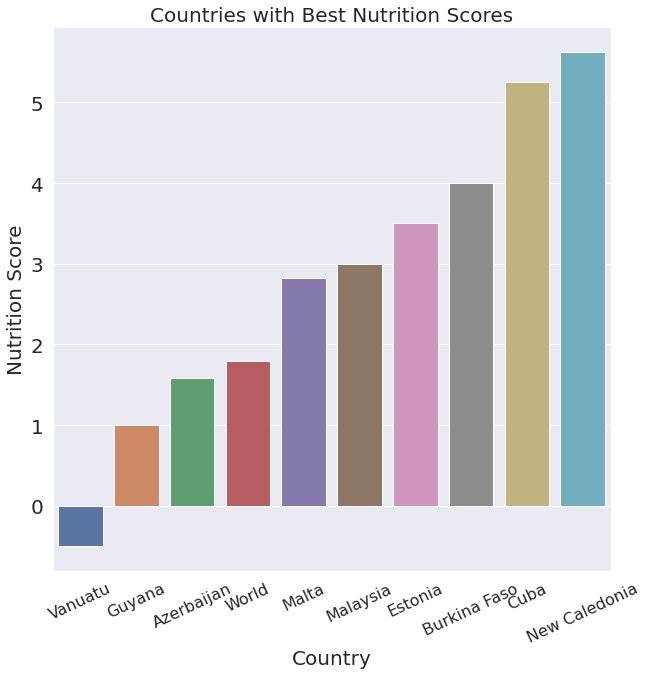

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale = 1)
chart=sns.barplot(x="countries_final",y="nutrition-score-fr_100g",data=best_scores,ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=25)
plt.title("Countries with Best Nutrition Scores",fontsize=20)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Nutrition Score",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=16)



**Dealing with Categorical Features**

Finally, one of the last steps involved determining how we wanted to handle the categorical features in the dataset. For the Open Food Facts datset, for example, this included the following feature columns: categories_tags, additives_en, pnns_groups_1, pnns_groups_2, labels_tags, and ingredients_text. These could either be one hot encoded or removed entirely from the dataset. At first attempt of one hot encoding, we realized that our dataset was so large that the session would crash when trying to one hot encode. We had the option to try using Apache Spark in order to handle "big data".  

However, in this case, we decided to first use the dataset that contained only numeric features, move forward in machine learning model development, and test the model's performance. If our model did not perform well enough using purely numerical data, then we would go back and perform one hot encoding in Apache Spark in order to improve any possible issues of underfitting the data. 

Luckily, as you will see larter in the notebook, our model performed fairly well using purely numeric data, so one hot encoding was not performed. 

## MODELING WITH MACHINE LEARNING

In [ ]:
df_open_food_facts=pd.read_csv("en.openfoodfacts.org.products.tsv",sep='\t')


In [ ]:
#Extract Feature and Y Columns
other_cols = ['product_name', 'ingredients_text']
y = ['nutrition-score-uk_100g']
features = ['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructose_100g',
 '-lactose_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g']

cols_to_keep = other_cols + features + y
cols_to_keep
df_open_food_facts = df_open_food_facts[cols_to_keep]

In [ ]:
#Drop cols with all NA
df_open_food_facts = df_open_food_facts.dropna(axis=1, how='all')
print("Dropped cols:")
set(cols_to_keep) - set(df_open_food_facts.columns)

Dropped cols:


{'-behenic-acid_100g',
 '-butyric-acid_100g',
 '-capric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-cerotic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 '-elaidic-acid_100g',
 '-erucic-acid_100g',
 '-gondoic-acid_100g',
 '-lignoceric-acid_100g',
 '-mead-acid_100g',
 '-melissic-acid_100g',
 '-montanic-acid_100g',
 '-myristic-acid_100g',
 '-nervonic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g'}

In [ ]:
#Update features list
features = list(set(features) - (set(cols_to_keep) - set(df_open_food_facts.columns)))

In [ ]:
#Drop any NAN y values
df_open_food_facts = df_open_food_facts.dropna(subset=y, how='any')

In [ ]:
#Fill NA with 0
df_open_food_facts = df_open_food_facts.fillna(0)

<font size="5">Checking Correlations</font>

Before performing any modeling, we need to check for any autocorrelations in the features. This is good practice because correlated features have equal prediction power, and we always want models with fewer parameters. But more importantly, if we are performaing feature analysis and comparing the magnitude of coeficients, we absolutely don't want correlated features. The coeficients of correlated features will steal magnitude from one another, masking the true prediction power of any one individually.

In [ ]:
#Plot correlation matrix
corrs = df_open_food_facts[features].corr()
corrs

,casein_100g,fat_100g,energy_100g,iron_100g,fluoride_100g,vitamin-c_100g,alcohol_100g,chloride_100g,biotin_100g,serum-proteins_100g,...,copper_100g,calcium_100g,selenium_100g,chromium_100g,-lauric-acid_100g,carbohydrates_100g,-sucrose_100g,-fructose_100g,vitamin-a_100g,vitamin-k_100g
casein_100g,1.000000,0.004290,0.007135,0.000310,0.120008,0.001572,-0.000051,0.734942,0.004052,0.549671,...,0.000057,0.001612,-0.000006,-0.000017,-0.000017,0.007427,0.000629,-0.000067,0.001697,-0.000014
fat_100g,0.004290,1.000000,0.628529,0.000351,-0.001845,-0.005962,-0.001503,0.002406,-0.002945,0.003156,...,0.000160,0.009369,0.001087,-0.000651,0.010740,-0.012993,-0.000727,-0.004419,0.000863,0.001014
energy_100g,0.007135,0.628529,1.000000,0.005556,-0.003355,-0.004990,-0.000651,0.002904,-0.002451,0.004530,...,-0.000857,0.005904,0.002028,0.000672,0.005606,0.417215,0.002194,0.001200,-0.004458,0.001459
iron_100g,0.000310,0.000351,0.005556,1.000000,0.000014,0.070298,-0.000074,0.000368,-0.000030,0.000198,...,-0.000018,0.058098,0.000014,-0.000023,-0.000027,0.012036,0.000986,-0.000095,0.000658,0.000032
fluoride_100g,0.120008,-0.001845,-0.003355,0.000014,1.000000,0.000302,-0.000029,0.124918,0.000947,0.004327,...,0.000008,0.000256,-0.000008,0.000002,-0.000010,-0.002400,-0.000016,-0.000039,0.000216,-0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
carbohydrates_100g,0.007427,-0.012993,0.417215,0.012036,-0.002400,0.001425,0.004156,0.004024,-0.000922,0.004933,...,-0.001424,-0.004511,0.002343,0.002085,-0.002117,1.000000,0.006283,0.010408,-0.003051,0.000632
-sucrose_100g,0.000629,-0.000727,0.002194,0.000986,-0.000016,-0.000007,-0.000022,0.000260,0.000780,0.000409,...,-0.000005,-0.000113,-0.000008,-0.000008,-0.000008,0.006283,1.000000,0.009789,-0.000169,-0.000008
-fructose_100g,-0.000067,-0.004419,0.001200,-0.000095,-0.000039,0.000002,-0.000046,-0.000100,-0.000037,-0.000048,...,-0.000010,-0.000232,-0.000016,-0.000016,-0.000015,0.010408,0.009789,1.000000,-0.000347,-0.000015
vitamin-a_100g,0.001697,0.000863,-0.004458,0.000658,0.000216,0.015217,-0.000263,0.002110,0.001375,0.001082,...,-0.000112,0.003030,0.000294,-0.000086,-0.000089,-0.003051,-0.000169,-0.000347,1.000000,0.000862


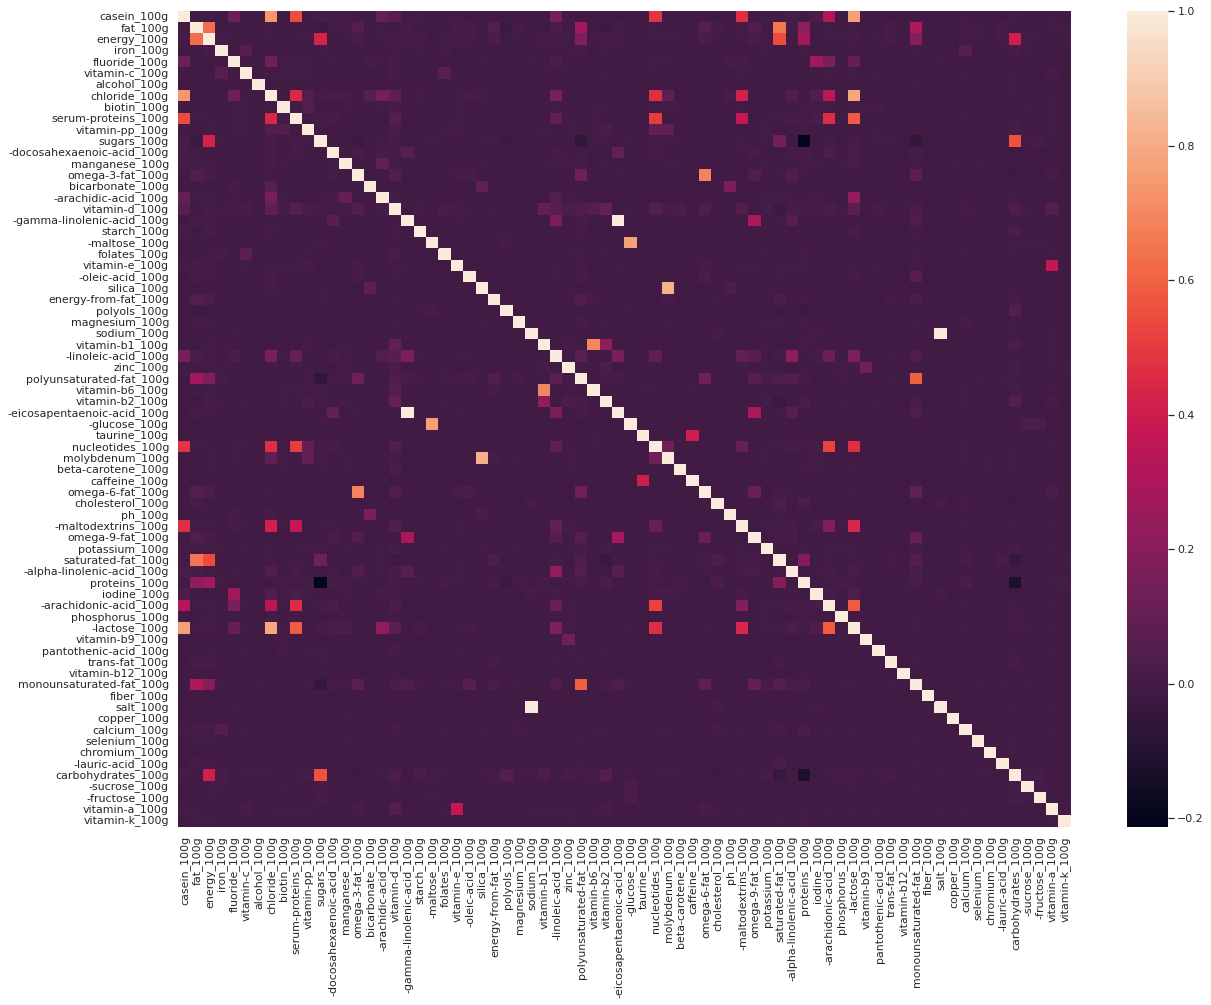

In [ ]:
#Plot correlation matrix heatmap
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corrs)
plt.show()

From above, the most correlated features are:
- Salt and sodium
- Eicosapentaenoic-acid and gamma-linolenic-acid 

These make sense: 
- Salt is made up of sodium 
- Eicosapentaenoic acid and gamma-linolenic acid are similar fatty acids

In [ ]:
#Finding Columns with correlation greater than c
c = 0.7
corrs_upper_triangle = corrs.where(np.triu(np.abs(corrs), 1).astype(bool))
corr_cols = [column for column in corrs_upper_triangle.columns if any(corrs_upper_triangle[column] > c)]
corr_cols

['chloride_100g',
 '-eicosapentaenoic-acid_100g',
 '-glucose_100g',
 'molybdenum_100g',
 '-lactose_100g',
 'salt_100g']

In [ ]:
#Update features list and drop correlated cols
features = list(set(features) - set(corr_cols))
df_open_food_facts_clean = df_open_food_facts.drop(columns = corr_cols)

In [ ]:
#Normalize features
df_open_food_facts_clean[features]=(df_open_food_facts_clean[features]-df_open_food_facts_clean[features].min())/(df_open_food_facts_clean[features].max()-df_open_food_facts_clean[features].min())

In [ ]:
df_open_food_facts_clean.head(3)

,product_name,ingredients_text,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-lauric-acid_100g,-arachidic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,...,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,nutrition-score-uk_100g
0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",0.009702,0.0,0.14285,0.051945,0.0,0.0,0.0,0.0,...,0.294976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
1,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.008395,0.0,0.08930,0.000000,0.0,0.0,0.0,0.0,...,0.294976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",0.010986,0.0,0.28570,0.009745,0.0,0.0,0.0,0.0,...,0.294976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


<font size="5">Modeling EDA and Train/Test Split</font>

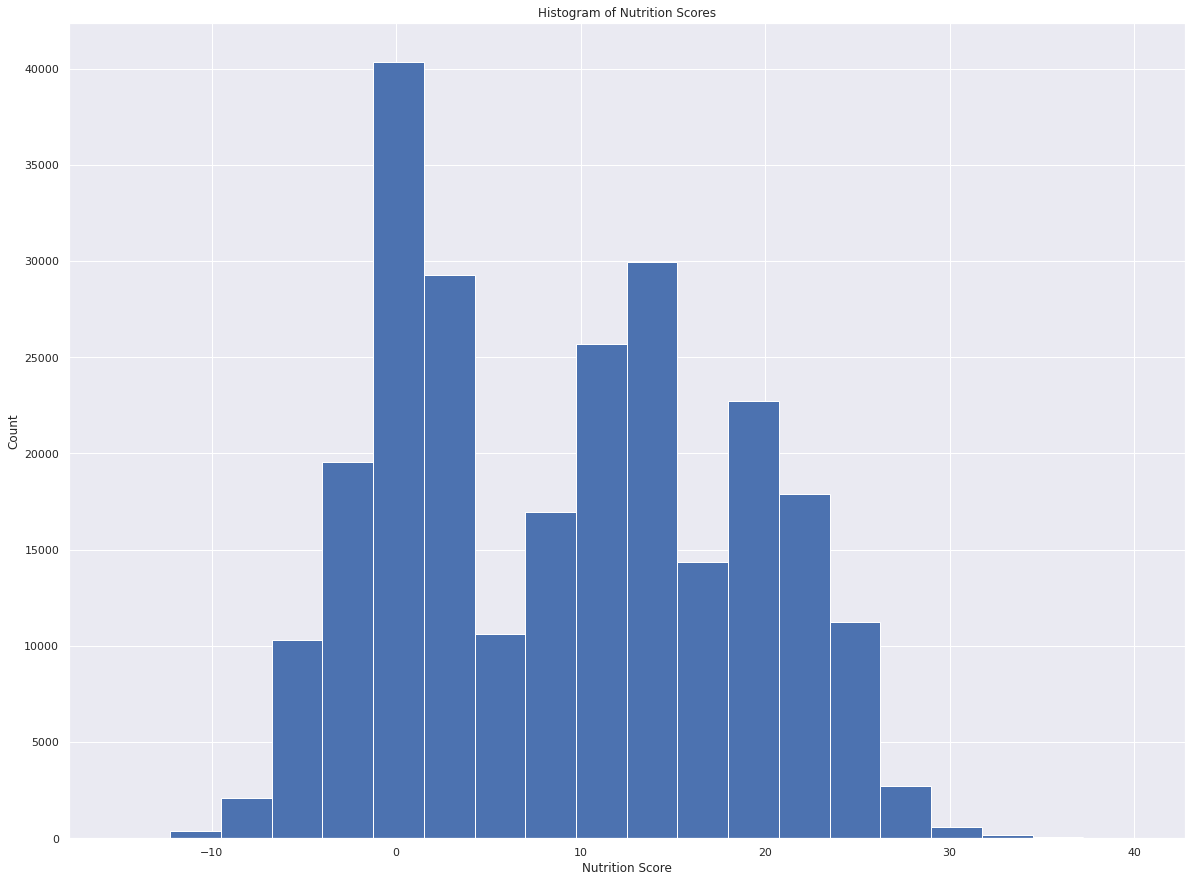

In [ ]:
#Plotting histogram of nutrition scores
plt.hist(df_open_food_facts_clean['nutrition-score-uk_100g'], bins=20)
plt.title('Histogram of Nutrition Scores')
plt.xlabel('Nutrition Score')
plt.ylabel('Count')
plt.show()

In [ ]:
#Splitting training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(df_open_food_facts_clean[features], df_open_food_facts_clean[y], test_size=0.2, random_state=25)

<font size="5">Linear Regression</font>

We will first start with a basic linear regression model.

In [ ]:
#Train Linear Regression Model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

train_pred = reg.predict(x_train)
test_pred = reg.predict(x_test)

train_score = reg.score(x_train, y_train)
test_score = reg.score(x_test, y_test)
train_mse = mean_squared_error(train_pred, y_train)
test_mse = mean_squared_error(test_pred, y_test)

In [ ]:
print("Train R^2: " + str(train_score))
print("Test R^2: " + str(test_score))
print("Train MSE: " + str(train_mse))
print("Test MSE: " + str(test_mse))

Train R^2: 0.5998875791317069
Test R^2: 0.4175771369443373
Train MSE: 33.49340763591776
Test MSE: 48.88369130004823


This model's performance is frankly terrible. The Test R^2 is well below 0.5, and the test MSE is a whopping 49. This means our model, on average, predicts a score that is 6.99 away from the true score. Given that the majority of scores lie between 0 and 20, this margin of error is not acceptable.  

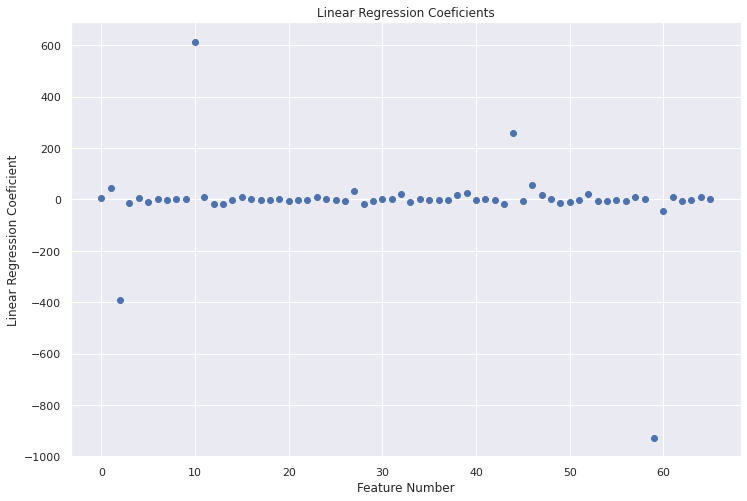

In [ ]:
#Coeficients for Feature Importance
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.scatter(np.arange(len(reg.coef_[0])), reg.coef_[0])
plt.xlabel('Feature Number')
plt.ylabel('Linear Regression Coeficient')
plt.title('Linear Regression Coeficients')
plt.show()

In [ ]:
#Back out the names of the most powerful features
ind = np.where((reg.coef_[0] > 100) | (reg.coef_[0] < -100))
df_open_food_facts_clean[features].columns[ind]

Index(['energy_100g', 'sugars_100g', 'saturated-fat_100g', 'chromium_100g'], dtype='object')

We can perform feature importance on the model by comparing each feature's coeficient and seeing which features have the most weight in the calculated nutritional score. We can do this because we normalized all features to be on the same scale before training.

Sugars and saturated fat are strong positive factors in nutrition score, and chromium and energy are strong negative factors. These intuitively make sense, but it does not excuse the model's poor performance.

The fact that there are a few very large coeficients and the rest are near zero indicates that we should add regularization to the regression model.

<font size="5">Ridge Correlations</font>

We will attempt to regularize the model by using ridge regression.

In [ ]:
#Train Ridge Regression model
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=10).fit(x_train, y_train)

ridge_train_pred = reg_ridge.predict(x_train)
ridge_test_pred = reg_ridge.predict(x_test)

ridge_train_score = reg_ridge.score(x_train, y_train)
ridge_test_score = reg_ridge.score(x_test, y_test)
ridge_train_mse = mean_squared_error(ridge_train_pred, y_train)
ridge_test_mse = mean_squared_error(ridge_test_pred, y_test)

In [ ]:
print("Train R^2: " + str(ridge_train_score))
print("Test R^2: " + str(ridge_test_score))
print("Train MSE: " + str(ridge_train_mse))
print("Test MSE: " + str(ridge_test_mse))

Train R^2: 0.5501210607509373
Test R^2: 0.5600458937065264
Train MSE: 37.65936250212822
Test MSE: 36.926058509113446


Using Ridge Regression improves the model over a linear baseline. The Test R^2 improves to below 0.56, and the test MSE lowers to 36.9. The model is improving, but perhaps nutritional scores are not formed using linear combinations of the features. We will next explore a different class of models.

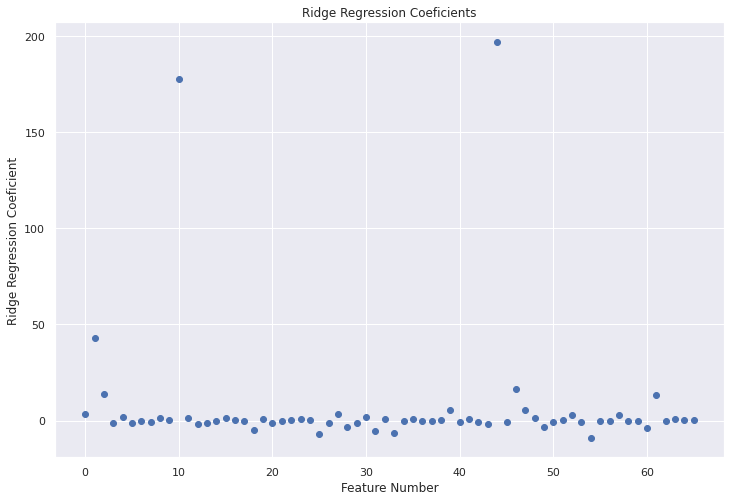

In [ ]:
#Coeficients for Feature Importance
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.scatter(np.arange(len(reg_ridge.coef_[0])), reg_ridge.coef_[0])
plt.xlabel('Feature Number')
plt.ylabel('Ridge Regression Coeficient')
plt.title('Ridge Regression Coeficients')
plt.show()

In [ ]:
#Back out the names of the most powerful features
ind_ridge = np.where((reg_ridge.coef_[0] > 20 | (reg_ridge.coef_[0] < -20)))
df_open_food_facts_clean[features].columns[ind_ridge]

Index(['fat_100g', 'sugars_100g', 'saturated-fat_100g'], dtype='object')

The Ridge Regression model shrinks the coeficients more towards zero with all coeficients being less than 200. The most predictive features for nutritional score int his model are saturated fat, sugar, and fat. Interestingly enough, these three features are all have positive coeficients.

<font size="5">Decision Tree</font>

The model class we will explore next is the decision tree model class. In the case of our  problem description, a decision tree model can be expected to perform well. A nutritional score built by thresholding certain nutritional components is a method that makes sense, and one we will explore for our final nutritional model.

In [ ]:
#Training Decision Tree model
from sklearn.tree import DecisionTreeRegressor

dectree = DecisionTreeRegressor(criterion = 'squared_error', random_state=0).fit(x_train, y_train)

dectree_train_pred = dectree.predict(x_train)
dectree_test_pred = dectree.predict(x_test)

dectree_train_score = dectree.score(x_train, y_train)
dectree_test_score = dectree.score(x_test, y_test)
dectree_train_mse = mean_squared_error(dectree_train_pred, y_train)
dectree_test_mse = mean_squared_error(dectree_test_pred, y_test)

In [ ]:
print("Tree Depth: " + str(dectree.get_depth()))
print("Number of Leaves: " + str(dectree.get_n_leaves()))

Tree Depth: 46
Number of Leaves: 65293


The trained model has a depth of 46 and 65247 leaves.  

In [ ]:
print("Train R^2: " + str(dectree_train_score))
print("Test R^2: " + str(dectree_test_score))
print("Train MSE: " + str(dectree_train_mse))
print("Test MSE: " + str(dectree_test_mse))

Train R^2: 0.9994021829076537
Test R^2: 0.9552507310969749
Train MSE: 0.05004326414616448
Test MSE: 3.755878393031536


The Decision Tree model performs considerably better compared to our linear models. On the holdout set, the model achieves a high R^2 of 0.955 and an MSE of only 3.8. This means the model, on average, predicts a nutrition score only 1.94 away from the original.

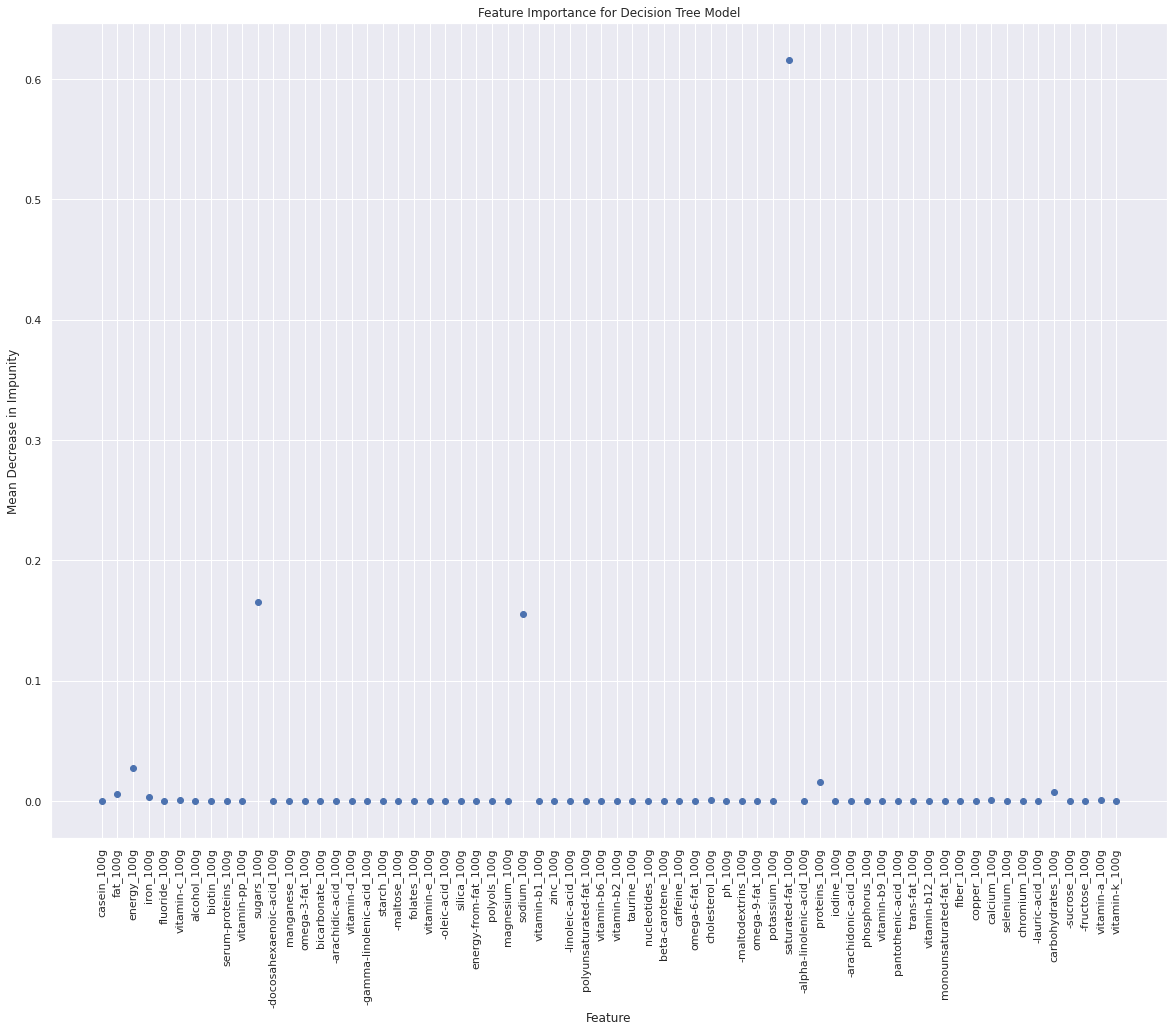

In [ ]:
importances = dectree.feature_importances_
plt.scatter(df_open_food_facts_clean[features].columns, importances)
plt.xticks(rotation='vertical')
plt.title("Feature Importance for Decision Tree Model")
plt.ylabel("Mean Decrease in Impunity")
plt.xlabel("Feature")
plt.show()

We can run a feature importance algorithm on the Decision Tree in order to determine which features factor the most in that data point's nutrition score. The algorithm functions by calculating the weighted probability of a data point reaching that feature's node, and the more data passing through a certain node, the more that node is contributing to the prediction. After running this algorithm, the most important features when calculating nutrition score are shown above. Like the ridge regression model, the decision tree weighs saturated fat and sugars highly, but it also determines salt as an important factor.

<font size="5">Random Forest (Final Model)</font>

Decision Trees are notorious to overfitting to training data and being unable to generalize to new data coming in. In order to produce more robustness, we will do two things. 
1. Use a Random Forest Model with 64 trees. Ensemble methods can help reduce overfitting because they reduce the power that a single tree's specific structure can have. 
2. Use cross validation in order to set the hyperparameter of max depth.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

x_rf = df_open_food_facts_clean[features].to_numpy()
y_rf = df_open_food_facts_clean[y].to_numpy().transpose()[0]

num_folds = 5
num_trees = 64
train_mse_array = []
test_mse_array = []

for max_depth in range(1, 50):
  print("Starting iteration " + str(max_depth))
  kfolds = KFold(n_splits=num_folds)
  fold_train_mse_cum = 0
  fold_test_mse_cum = 0

  for s in kfolds.split(x_train):
    train_indices = s[0]
    test_indices = s[1]
    rf = RandomForestRegressor(n_estimators = num_trees, criterion = 'squared_error', random_state=0, max_depth=max_depth).fit(x_rf[train_indices], y_rf[train_indices])
    
    rf_train_pred = rf.predict(x_rf[train_indices])
    rf_test_pred = rf.predict(x_rf[test_indices])

    rf_train_mse = mean_squared_error(rf_train_pred, y_rf[train_indices])
    rf_test_mse = mean_squared_error(rf_test_pred, y_rf[test_indices])
    
    fold_train_mse_cum += rf_train_mse
    fold_test_mse_cum += rf_test_mse

  train_mse_array.append(fold_train_mse_cum / num_folds)
  test_mse_array.append(fold_test_mse_cum / num_folds)


Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 5
Starting iteration 6
Starting iteration 7
Starting iteration 8
Starting iteration 9
Starting iteration 10
Starting iteration 11
Starting iteration 12
Starting iteration 13
Starting iteration 14
Starting iteration 15
Starting iteration 16
Starting iteration 17
Starting iteration 18
Starting iteration 19
Starting iteration 20
Starting iteration 21
Starting iteration 22
Starting iteration 23
Starting iteration 24
Starting iteration 25
Starting iteration 26
Starting iteration 27
Starting iteration 28
Starting iteration 29
Starting iteration 30
Starting iteration 31
Starting iteration 32
Starting iteration 33
Starting iteration 34
Starting iteration 35
Starting iteration 36
Starting iteration 37
Starting iteration 38
Starting iteration 39
Starting iteration 40
Starting iteration 41
Starting iteration 42
Starting iteration 43
Starting iteration 44
Starting iteration 45
Starting iteration 

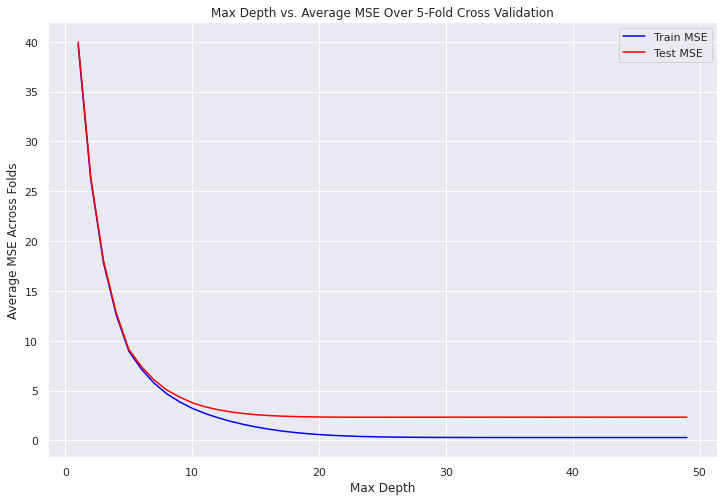

In [ ]:
#Plotting Training and Testing Error
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.plot(np.arange(1, 50), train_mse_array, color='blue', label='Train MSE')
plt.plot(np.arange(1, 50), test_mse_array, color='red', label='Test MSE')
plt.title("Max Depth vs. Average MSE Over 5-Fold Cross Validation")
plt.xlabel("Max Depth")
plt.ylabel("Average MSE Across Folds")
plt.legend()
plt.show()

The test MSE bottoms out when the max depth reaches about 25. In order to prevent overfitting, we want to choose the smallest max depth that gives us the best performance on our testing data. Thus we should choose a max depth of 25 in our final model.

In [ ]:
#Train final Random Forest model
from sklearn.ensemble import RandomForestRegressor

y_train_1d = y_train.to_numpy().transpose()[0]
rf = RandomForestRegressor(n_estimators = 64, criterion = 'squared_error', random_state=0, max_depth=25).fit(x_train, y_train_1d)

rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

rf_train_score = rf.score(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
rf_train_mse = mean_squared_error(rf_train_pred, y_train)
rf_test_mse = mean_squared_error(rf_test_pred, y_test)

In [ ]:
print("Train R^2: " + str(rf_train_score))
print("Test R^2: " + str(rf_test_score))
print("Train MSE: " + str(rf_train_mse))
print("Test MSE: " + str(rf_test_mse))

Train R^2: 0.9949094948768022
Test R^2: 0.9759388647997611
Train MSE: 0.42612614423213113
Test MSE: 2.019489927449483


The final random forest model has improved on all our previous models. The R^2 on the test set is 0.98, and the MSE on the testing set is down to 2.02, meaning the average predicted score for a particular food item is merely 1.42 away from its actual score. 

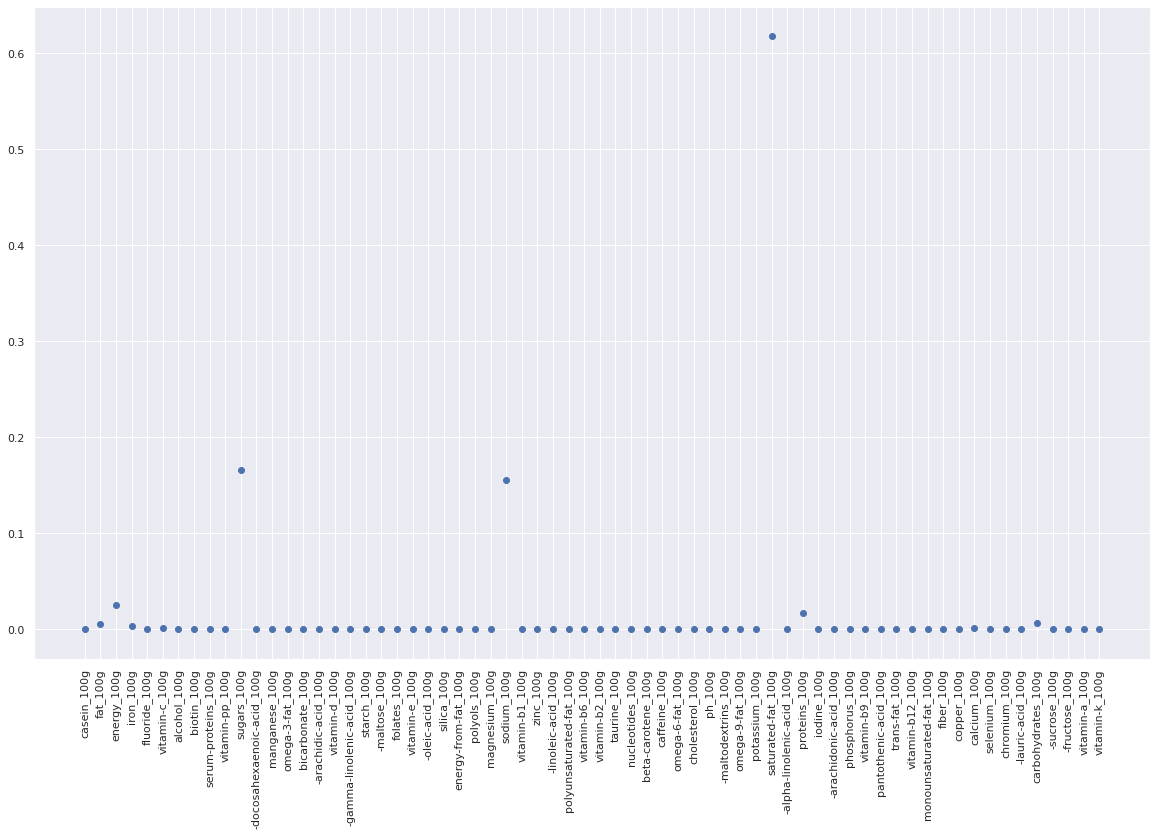

In [ ]:
rf_importances = rf.feature_importances_
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.scatter(df_open_food_facts_clean[features].columns, rf_importances)
plt.xticks(rotation='vertical')
plt.show()

With this final model, we can extrapolate the most important features and learn what factors into the UK Nutritional Score calculation. Saturated fat remains the most important factor, followed by sugars and sodium. Energy, proteins, and carbohydrates make up the last three most significant factors 